In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from glob import glob
import csv
import sys
sys.path.append('/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/')
from GrabListScript_v2 import AvailableDF

In [2]:
df_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/DF_dir/'
objects_df = pd.read_parquet(df_dir + 'objects_master_22_10_28.parquet')
real_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/REAL_FITS_11_04v2_dir/'

In [3]:
df = objects_df.loc[(objects_df['SnapNum'] > 28) & (objects_df['SnapNum'] < 50)]

In [4]:
with_imgs = pd.read_parquet('AvailableDF')
    

In [12]:
df['SSFR'] = df['SFR']/df['Mstellar']
with_imgs['SSFR'] = with_imgs['SFR']/with_imgs['Mstellar']

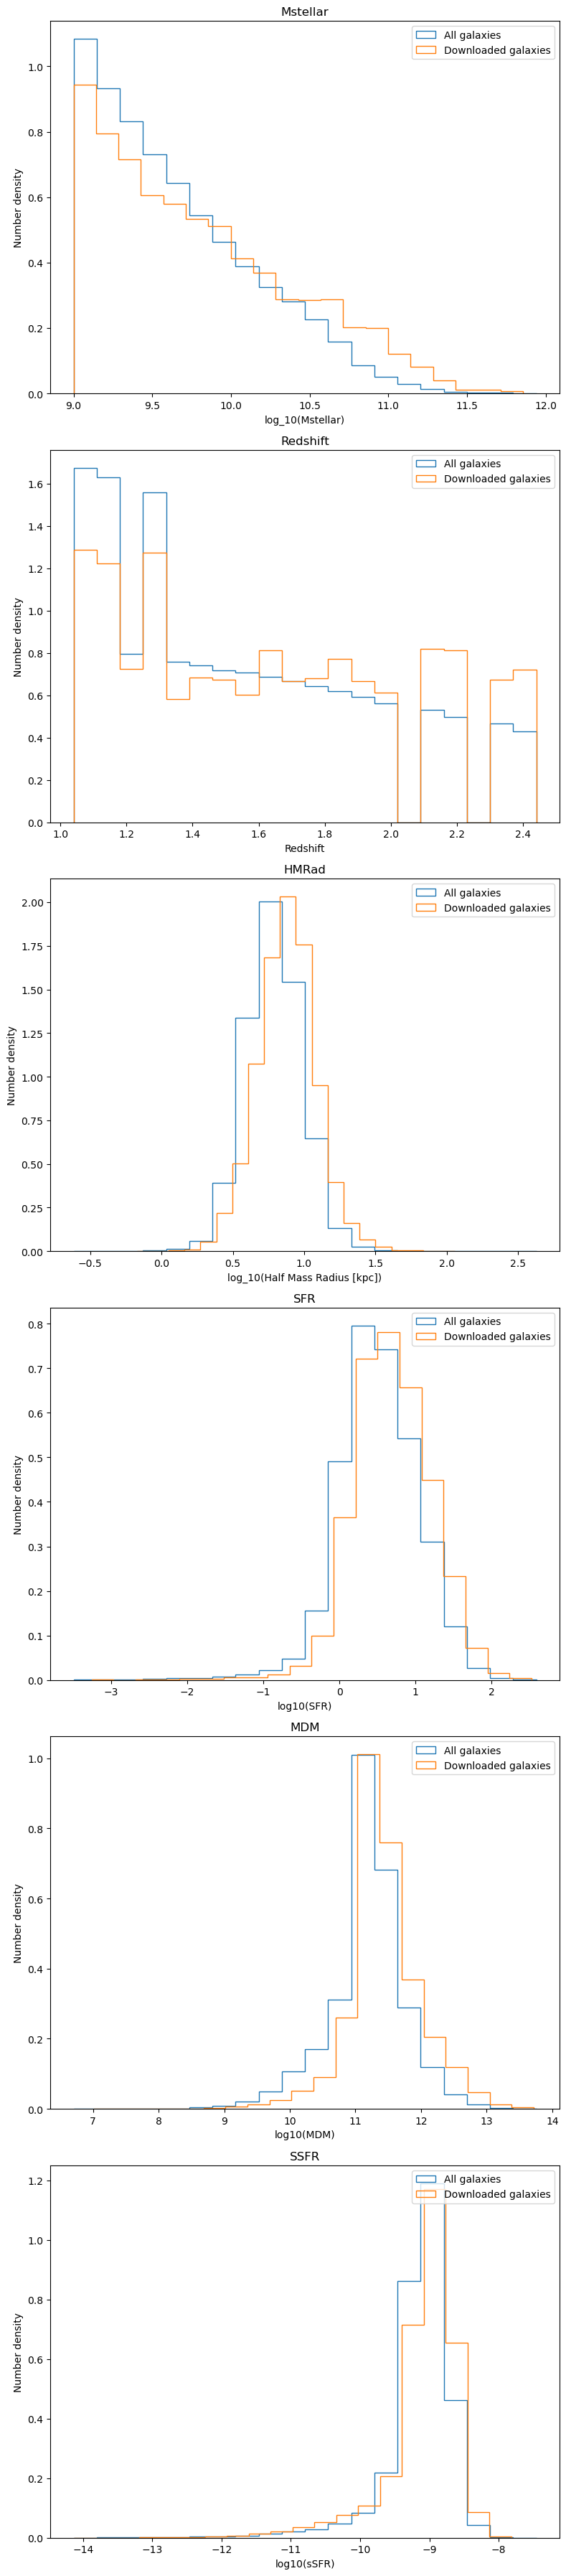

In [20]:
df = df[df['Mstellar'] > 0.1]
with_imgs = with_imgs[with_imgs['Mstellar'] > 0.1]

params = ['Mstellar', 'Redshift', 'HMRad', 'SFR', 'MDM', 'SSFR']
no_log = ['Redshift']
xlabels = {'Mstellar' : 'log_10(Mstellar)', 'Redshift' : 'Redshift', 'HMRad' : 'log_10(Half Mass Radius [kpc])', 'edd_ratio':'log10(Eddington Ratio)', 'Edd_ratio':'log10(Eddington Ratio)', 'Mass/radius**2' : 'log10(Mass/radius**2)', 'SFR/Mass':'SFR/Mass', 'SFR': 'log10(SFR)', 'MDM':'log10(MDM)', 'SSFR':'log10(sSFR)'}
scale = {'Mstellar': 1e10, 'MDM': 1e10, 'Mgas': 1e10, 'HMRad': 1/0.7, 'MBH': 1e10, 'BHacc' : 1e10, 'SFR' : 1, 'edd_ratio' : 1, 'Edd_ratio' : 1, 'Mass/radius**2' : 1e10/((1/0.7)**2), 'SSFR' :1e-10, 'Redshift':1}





fig = plt.figure(figsize = (8, 6*len(params)))
ax = fig.subplots(len(params), 1)

for i, param in enumerate(params):
    if param in no_log:
        ax[i].hist(df[param] * scale[param], bins = 20, density = True, histtype = 'step', label = 'All galaxies')
        ax[i].hist(with_imgs[param] * scale[param], bins = 20,density = True, histtype = 'step', label = 'Downloaded galaxies')
    else:
        ax[i].hist(np.log10(df.loc[df[param] > 0][param] * scale[param]), bins = 20, density = True, histtype = 'step', label = 'All galaxies')
        ax[i].hist(np.log10(with_imgs.loc[with_imgs[param] > 0][param] * scale[param]), bins = 20, density = True, histtype = 'step', label = 'Downloaded galaxies')
        
    ax[i].set_ylabel('Number density')
    ax[i].set_title(param)
    ax[i].set_xlabel(xlabels[param])
    ax[i].legend()
    
fig.tight_layout()

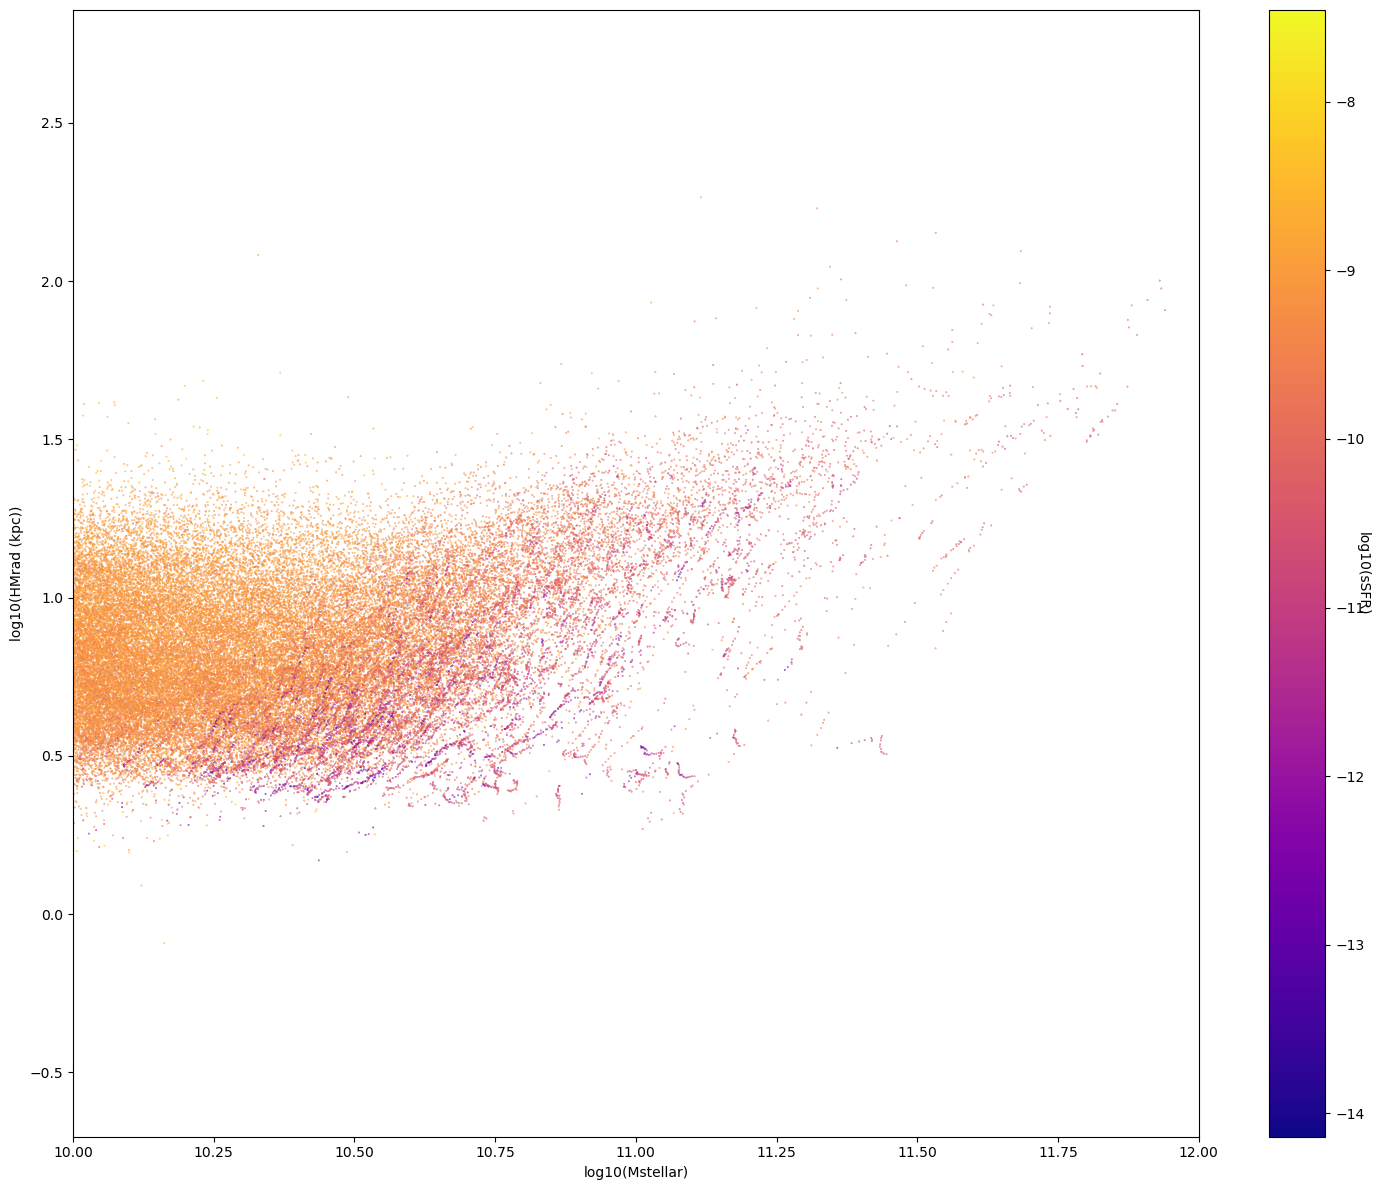

In [29]:
fig = plt.figure(figsize = (15, 12))
param1 = 'Mstellar'
param2 = 'HMRad'
results = df
plt.scatter(np.log10(results[param1] * 1e10), np.log10(results[param2] * 1/0.6), s=0.1, c = np.log10(results['SSFR'] * 1e-10), cmap = 'plasma')

plt.xlabel('log10(Mstellar)')
plt.ylabel('log10(HMrad (kpc))')
plt.xlim(10,12)

cbar = plt.colorbar()
cbar.set_label('log10(sSFR)', rotation=270)
plt.tight_layout()